# Data cleaning

Learn how to effectively clean your data by tackling data discrepancies such as noisy data, missing values, outliers and inconsistencies

There are three levels of data cleaning:

*   **First level-General cleaning steps:** By cleaning up the table in order to have a standard data structure and attributes that have intuitive and codable names and rows that have unique identifiers (already done)
*   **Second level-By Unpacking, restructuriing and reformatting the table**(already done)
*   **Third level-**By Dealing with data errors, missing values, detecting and handling outliers, smoothing data (during this serie of programming labs)



---
> Author: Dr. Fadoua Ouamani


---



In [1]:
import pandas as pd    # to handle the dataframe
pd.set_option('expand_frame_repr', False) #to avoid the multi-lines formatting of the dataframe
import numpy as np     # to handle numbers and ndarray
import missingno as msno #to visualize missing data and get a quick visual summary of the completeness of the data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Charger le dataset
data_path = "/content/drive/MyDrive/big data/tayou.csv"
tayou_df = pd.read_csv(data_path)

In [4]:
tayou_df

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.0,15.00,15.0,18.00,No,M
1,Otter,No,23,Pisces,French,NaN,NaN,NaN,NaN,No,M
2,Lion,No,23,Leo,English,10.0,10.00,13.0,13.00,Yes,M
3,Lion,No,22,Scorpio,English,14.0,12.00,17.0,15.00,Yes,F
4,Lion,No,23,Leo,French,18.0,18.15,16.0,15.00,Yes,F
...,...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,13.0,15.00,16.0,14.00,Yes,M
98,Lion,No,22,Scorpio,French,14.0,15.00,14.0,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,16.0,17.00,12.0,13.00,No,M
100,Beaver,No,23,Pisces,French,14.0,15.00,13.0,12.00,Yes,F


**Interpretations:**

we can see that we have missingf values in our dataset

In [ ]:
tayou_df.info()

**Interpretations:**

### 1. Missing Values

In [5]:
tayou_df.isnull()

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
97,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False,False


**Interpretations:**

this function replace the nan value with true

In [6]:
print('Number of missing values per column')
for colm in tayou_df.columns:
  n_mv=tayou_df[colm].isnull().sum()
  print(f'{colm}: {n_mv}')

Number of missing values per column
Personality: 0
Collector: 0
Age: 0
ZodiacSign: 0
FavLg: 1
GStat: 9
GMath: 7
GOOP: 8
GEnglish: 6
LearnNSkill: 0
Gender: 0


**Interpretations:**

in FavLg we have 1 missing value

in GStat we have 9 missing values

GMath we have 7 missing values

GOOP we have 8 missing values

GEnglish we have 6 missing values

<Axes: >

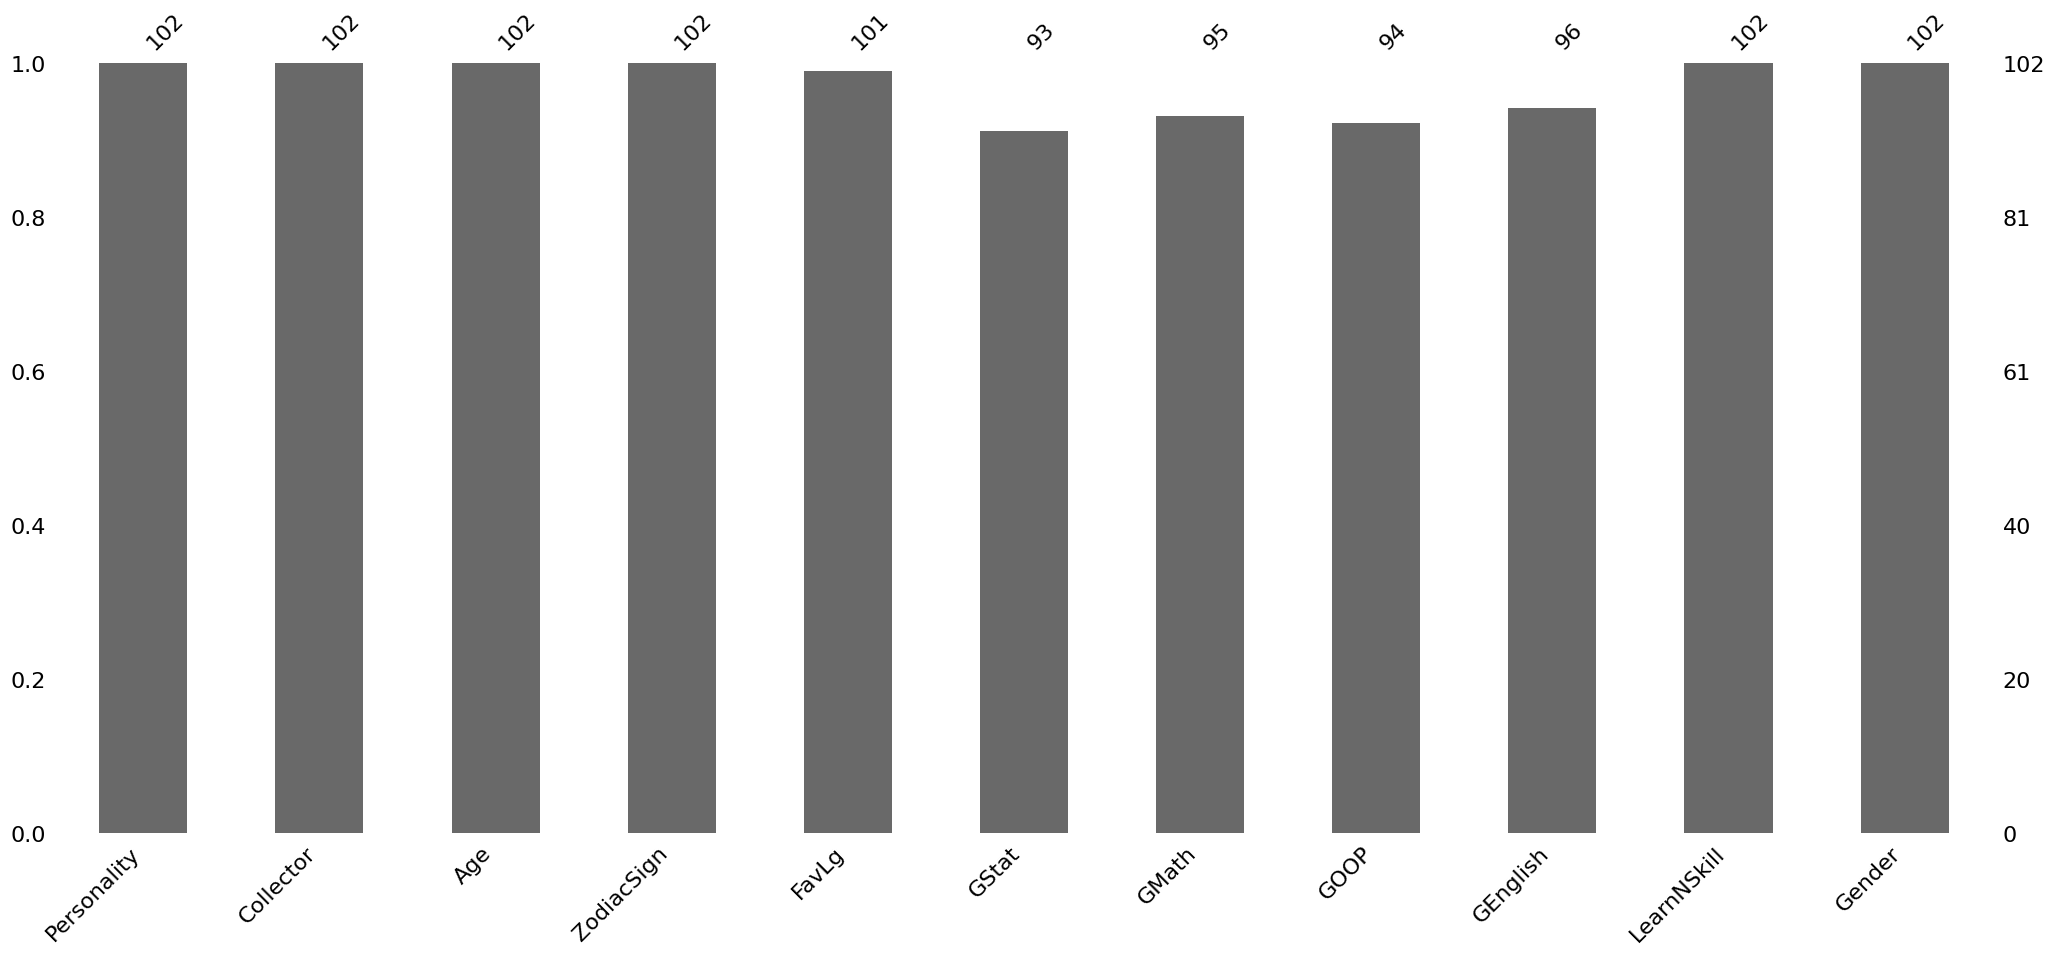

In [7]:
#Visualization of missing value rates using the bar plot
msno.bar(tayou_df)

**Interpretations:**

This plot shows the columns with missing values.

<Axes: >

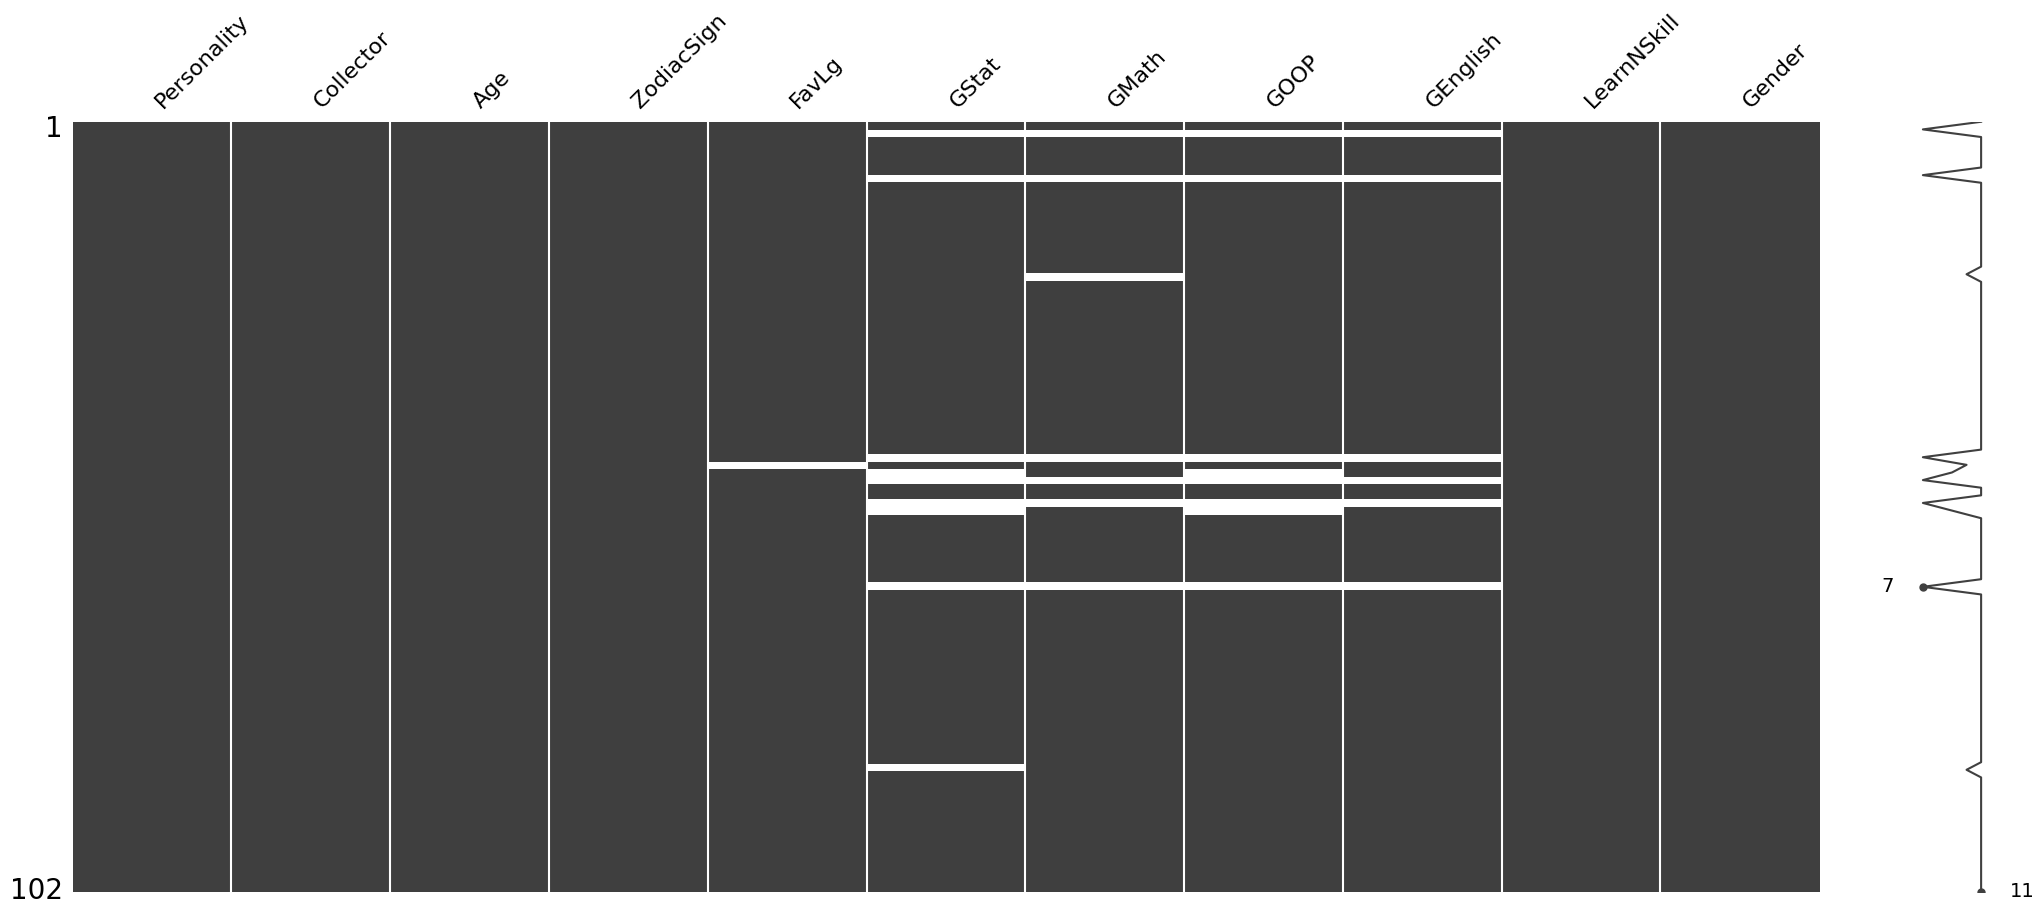

In [8]:
#Finding reasons for missing data using matrix plot
msno.matrix(tayou_df)

**Interpretations:**

the white spots are the missing values
we can see some patterns in fact when we have a missing value in GStat there is a tendency that we have missing value in GMath ,GOOP and GEnglish

<Axes: >

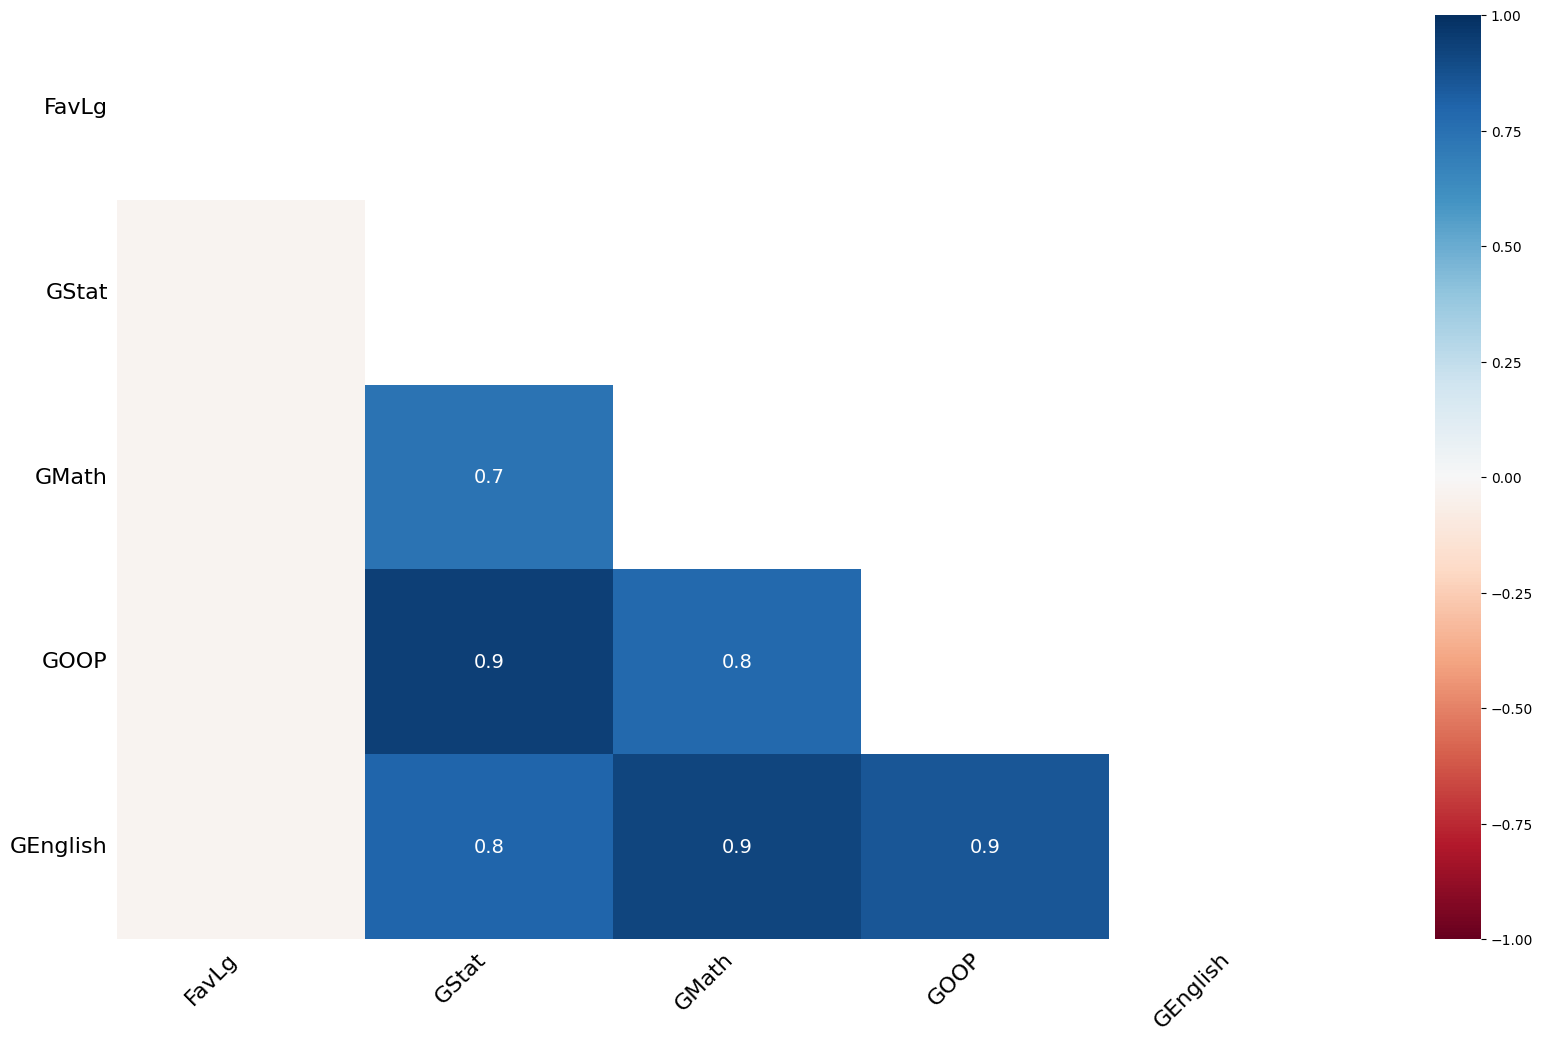

In [9]:
#Finding reasons for missing data using a heatmap
msno.heatmap(tayou_df)

**Interpretations:**

GStat is highly correlated with GOOP

GMath is highly correlated with GEnglish

GOOP is highly correlated with GEnglish

<Axes: >

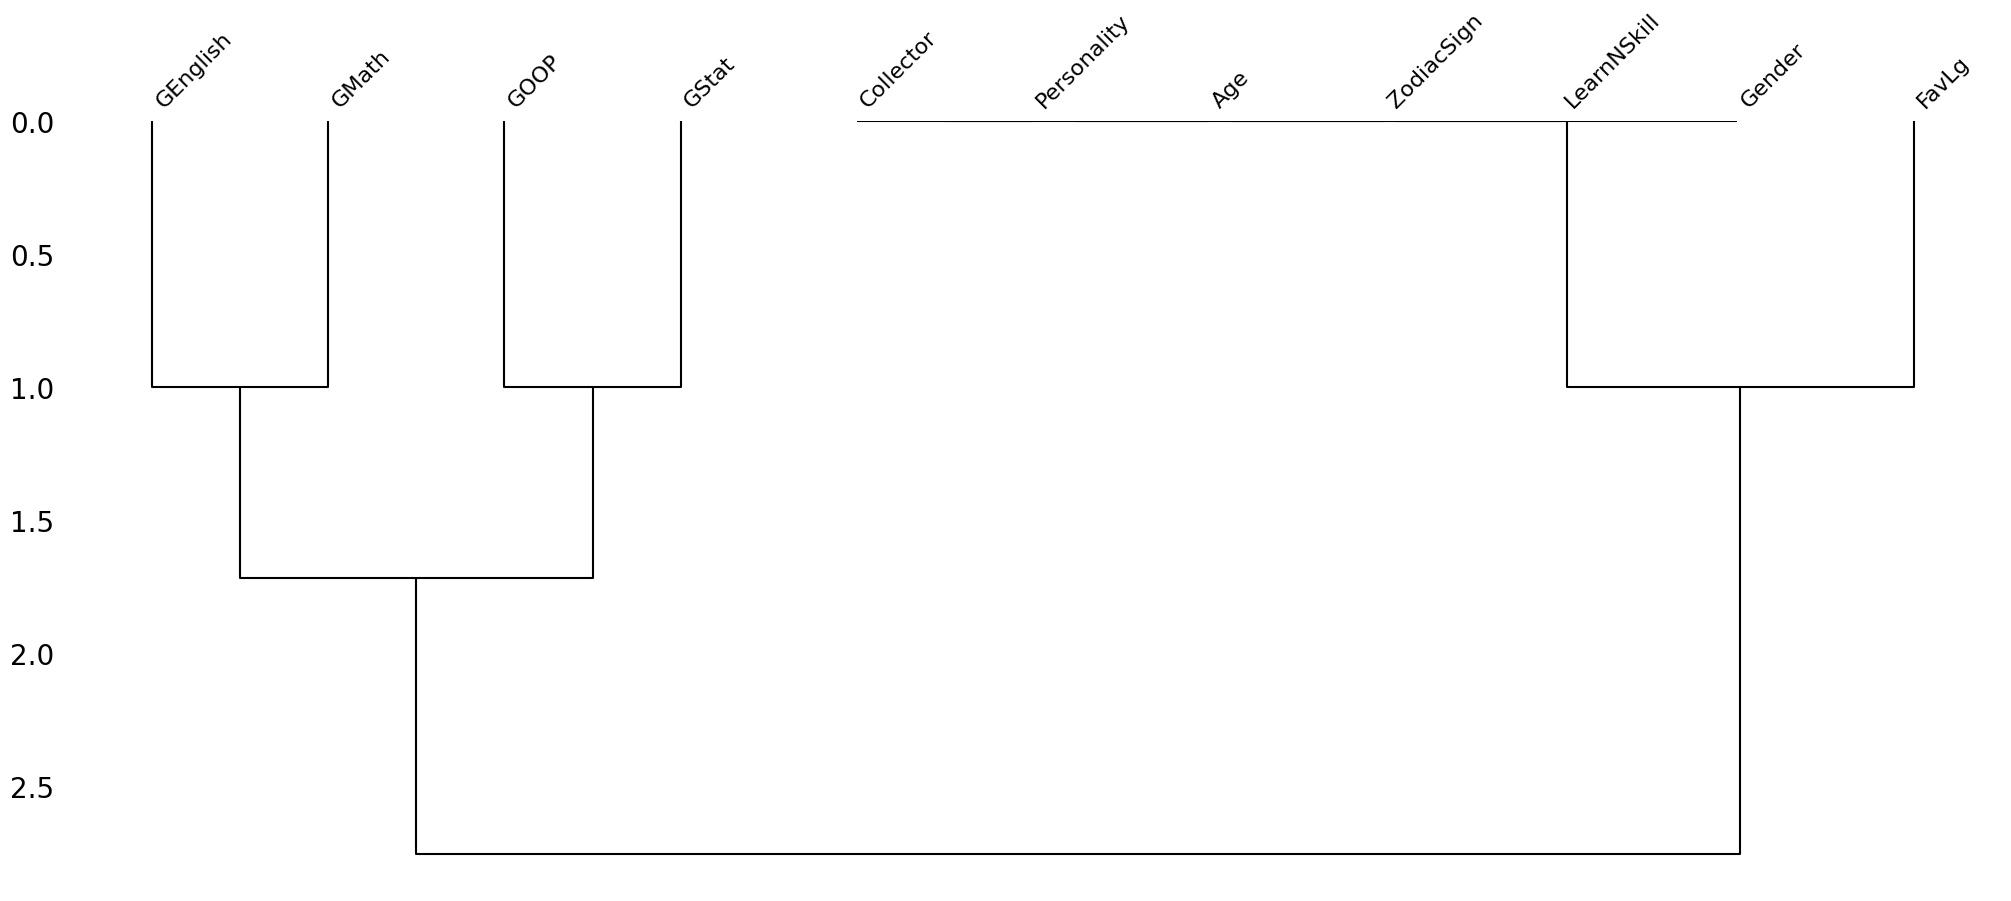

In [10]:
#Finding reasons for missing data using a dendrogram
msno.dendrogram(tayou_df)

**Interpretations:**

This shows the hierarchical clustering of missing values in the DataFrame tayou_df. It helps identify similarities and differences in the patterns of missing data across different features.

**Key insights from the dendrogram include:**

* It shows how features are grouped based on their missing value patterns, allowing you to see which features have similar missing data characteristics.

* Hierarchical Tree Structure: The dendrogram displays a tree structure, where branches indicate the level of similarity between features based on their missingness. Shorter branches suggest a higher similarity.

* Identification of Data Patterns: It can reveal potential relationships between features, which may point to data collection issues or assist in decisions regarding data imputation or feature selection.

In [11]:
#Deletions
#Pairwise deletion
tayou_df_wmv = tayou_df.copy()
tayou_df_wmv['GStat'].mean() #pandas skips the missing values and calculates mean of the remaining values.

13.966451612903226

In [12]:
#Deletions
#Listwise deleltions
tayou_df_wmv.dropna(subset=['GStat'],how='any',inplace=True)
tayou_df_wmv['GStat'].isnull().sum()

0

In [13]:
tayou_df_wmv

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.0,15.00,15.00,18.00,No,M
2,Lion,No,23,Leo,English,10.0,10.00,13.00,13.00,Yes,M
3,Lion,No,22,Scorpio,English,14.0,12.00,17.00,15.00,Yes,F
4,Lion,No,23,Leo,French,18.0,18.15,16.00,15.00,Yes,F
5,Lion,Yes,23,Taurus,French,16.5,12.20,13.62,14.50,Yes,M
...,...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,13.0,15.00,16.00,14.00,Yes,M
98,Lion,No,22,Scorpio,French,14.0,15.00,14.00,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,16.0,17.00,12.00,13.00,No,M
100,Beaver,No,23,Pisces,French,14.0,15.00,13.00,12.00,Yes,F


**Interpretations:**

in this approach we chose to delete the rows where we have missing values for the GStat columns

In [14]:
#Deletions
#Dropping the entire columns
tayou_df_wmv.drop('GStat',axis=1,inplace=True)
tayou_df_wmv

,Personality,Collector,Age,ZodiacSign,FavLg,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.00,15.00,18.00,No,M
2,Lion,No,23,Leo,English,10.00,13.00,13.00,Yes,M
3,Lion,No,22,Scorpio,English,12.00,17.00,15.00,Yes,F
4,Lion,No,23,Leo,French,18.15,16.00,15.00,Yes,F
5,Lion,Yes,23,Taurus,French,12.20,13.62,14.50,Yes,M
...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,15.00,16.00,14.00,Yes,M
98,Lion,No,22,Scorpio,French,15.00,14.00,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,17.00,12.00,13.00,No,M
100,Beaver,No,23,Pisces,French,15.00,13.00,12.00,Yes,F


In [16]:
#Imputations for non time series data
# imputing with a constant
from sklearn.impute import SimpleImputer
tayou_df_const = tayou_df.copy()
#setting strategy to 'constant'
const_imputer = SimpleImputer(strategy='constant') # imputing using constant value
tayou_df_const.iloc[:,:] = const_imputer.fit_transform(tayou_df_const)
tayou_df_const.isnull().sum()

<ipython-input-16-c4144438e8a2>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[15.0, 'missing_value', 10.0, 14.0, 18.0, 16.5, 15.0, 'missing_value', 16.0, 15.98, 13.0, 12.0, 15.0, 15.0, 14.3, 10.0, 18.08, 11.0, 16.0, 12.0, 16.7, 10.0, 12.0, 8.4, 12.35, 10.0, 18.0, 13.0, 19.0, 15.38, 15.9, 15.0, 10.53, 17.98, 15.0, 9.0, 16.65, 13.0, 14.0, 16.84, 18.0, 9.8, 10.0, 11.74, 'missing_value', 15.49, 'missing_value', 'missing_value', 16.4, 11.4, 'missing_value', 'missing_value', 12.0, 11.0, 17.0, 15.0, 11.09, 15.0, 15.0, 15.0, 10.0, 'missing_value', 15.0, 15.0, 18.0, 10.0, 14.0, 10.5, 12.0, 15.0, 17.0, 14.0, 15.0, 10.25, 15.5, 17.5, 18.5, 16.79, 15.0, 14.0, 13.0, 14.0, 12.0, 13.0, 16.0, 'missing_value', 13.33, 16.0, 13.0, 10.0, 13.0, 15.0, 17.0, 16.0, 12.0, 12.0, 12.0, 13.0, 14.0, 16.0, 14.0, 12.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tayou_df_const.iloc[:,:] = const

,0
Personality,0
Collector,0
Age,0
ZodiacSign,0
FavLg,0
GStat,0
GMath,0
GOOP,0
GEnglish,0
LearnNSkill,0


In [17]:
tayou_df_const

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.0,15.0,15.0,18.0,No,M
1,Otter,No,23,Pisces,French,missing_value,missing_value,missing_value,missing_value,No,M
2,Lion,No,23,Leo,English,10.0,10.0,13.0,13.0,Yes,M
3,Lion,No,22,Scorpio,English,14.0,12.0,17.0,15.0,Yes,F
4,Lion,No,23,Leo,French,18.0,18.15,16.0,15.0,Yes,F
...,...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,13.0,15.0,16.0,14.0,Yes,M
98,Lion,No,22,Scorpio,French,14.0,15.0,14.0,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,16.0,17.0,12.0,13.0,No,M
100,Beaver,No,23,Pisces,French,14.0,15.0,13.0,12.0,Yes,F


**interpretations**

The SimpleImputer is initialized with the strategy set to 'constant', meaning it replaces missing values with a specified constant value, which in this case is missing_value.

In [18]:
#Imputations for non time series data
# imputing with general central tendency
tayou_df_centTend = tayou_df.copy()
#setting strategy to 'most_frequent' to impute by the mode
md_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median, by default mean
tayou_df_centTend.iloc[:,:] = md_imputer.fit_transform(tayou_df_centTend)
tayou_df_centTend.isnull().sum()

,0
Personality,0
Collector,0
Age,0
ZodiacSign,0
FavLg,0
GStat,0
GMath,0
GOOP,0
GEnglish,0
LearnNSkill,0


In [19]:
tayou_df_centTend

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.0,15.00,15.0,18.00,No,M
1,Otter,No,23,Pisces,French,15.0,15.00,15.0,15.00,No,M
2,Lion,No,23,Leo,English,10.0,10.00,13.0,13.00,Yes,M
3,Lion,No,22,Scorpio,English,14.0,12.00,17.0,15.00,Yes,F
4,Lion,No,23,Leo,French,18.0,18.15,16.0,15.00,Yes,F
...,...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,13.0,15.00,16.0,14.00,Yes,M
98,Lion,No,22,Scorpio,French,14.0,15.00,14.0,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,16.0,17.00,12.0,13.00,No,M
100,Beaver,No,23,Pisces,French,14.0,15.00,13.0,12.00,Yes,F


**interpretations**

The SimpleImputer is initialized with the strategy set to 'most_frequent', meaning it replaces missing values with a specified constant value, which in this case is 15.00.

In [20]:
num_split=tayou_df.loc[:,tayou_df.dtypes!=object]


In [21]:
#Advanced imputation techniques
#Using KNN
num_split_knn= num_split.copy()
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, metric='nan_euclidean', weights='uniform') #By default parameters except the n_neighbors changed to 3 as it was 5
num_split_knn.iloc[:,:] = imputer.fit_transform(num_split_knn)
num_split_knn.isnull().sum()

,0
Age,0
GStat,0
GMath,0
GOOP,0
GEnglish,0


In [22]:
num_split_knn

,Age,GStat,GMath,GOOP,GEnglish
0,24,15.000000,15.00,15.000000,18.000000
1,23,14.833333,13.45,14.206667,14.166667
2,23,10.000000,10.00,13.000000,13.000000
3,22,14.000000,12.00,17.000000,15.000000
4,23,18.000000,18.15,16.000000,15.000000
...,...,...,...,...,...
97,23,13.000000,15.00,16.000000,14.000000
98,22,14.000000,15.00,14.000000,14.330000
99,24,16.000000,17.00,12.000000,13.000000
100,23,14.000000,15.00,13.000000,12.000000


In [23]:
#Advanced imputation techniques
#Using MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer #Multivariate imputer that estimates each feature from all the others, as a function of other features in a round-robin fashion
tayou_df_mice = tayou_df.copy()

mice_imputer = IterativeImputer()
tayou_df_mice['GStat'] = mice_imputer.fit_transform(tayou_df_mice[['GStat']])
tayou_df_mice.isnull().sum()

,0
Personality,0
Collector,0
Age,0
ZodiacSign,0
FavLg,1
GStat,0
GMath,7
GOOP,8
GEnglish,6
LearnNSkill,0


In [ ]:
tayou_df_mice

**Exercice:**

Study the central tendency, dispersion, symmetry of your data after getting rid of missing values and outliers using these techniques
Indication: You will need to do the same tasks as Progromming lab 1 on your cleaned data

In [31]:
tayou_df.describe()

,Age,GStat,GMath,GOOP,GEnglish
count,102.000000,93.000000,95.000000,94.000000,96.000000
mean,23.156863,13.966452,13.803895,14.721702,14.134479
std,1.272287,2.568432,2.263178,1.856815,2.243978
min,22.000000,8.400000,7.000000,10.000000,8.000000
25%,23.000000,12.000000,12.000000,13.715000,13.000000
50%,23.000000,14.000000,14.000000,15.000000,14.180000
75%,23.000000,16.000000,15.000000,16.000000,15.000000
max,32.000000,19.000000,20.000000,18.000000,20.000000


we can see the mean of GStat =13,966 /GMath =13.80 /GOOP=14.72 /GEnglish=14.13

In [32]:
# Let's focus only on the columns GStat, GMath, GEnglish, and GOOP to calculate central tendency, dispersion, and symmetry
columns_of_interest = ['GStat', 'GMath', 'GOOP', 'GEnglish']

# Convert the relevant columns to numeric, errors='coerce' will turn any non-numeric data into NaN
tayou_df[columns_of_interest] = tayou_df[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Central tendency
mean_values = tayou_df[columns_of_interest].mean()
median_values = tayou_df[columns_of_interest].median()
mode_values = tayou_df[columns_of_interest].mode().iloc[0]

# Dispersion
variance = tayou_df[columns_of_interest].var()
std_dev = tayou_df[columns_of_interest].std()

# Symmetry
skewness = tayou_df[columns_of_interest].skew()
kurtosis = tayou_df[columns_of_interest].kurtosis()

# Display the results
print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Mode values:\n", mode_values)
print("Variance:\n", variance)
print("Standard Deviation:\n", std_dev)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)


Mean values:
 GStat       13.966452
GMath       13.803895
GOOP        14.721702
GEnglish    14.134479
dtype: float64
Median values:
 GStat       14.00
GMath       14.00
GOOP        15.00
GEnglish    14.18
dtype: float64
Mode values:
 GStat       15.0
GMath       15.0
GOOP        15.0
GEnglish    15.0
Name: 0, dtype: float64
Variance:
 GStat       6.596845
GMath       5.121973
GOOP        3.447763
GEnglish    5.035438
dtype: float64
Standard Deviation:
 GStat       2.568432
GMath       2.263178
GOOP        1.856815
GEnglish    2.243978
dtype: float64
Skewness:
 GStat      -0.154907
GMath      -0.232538
GOOP       -0.342040
GEnglish   -0.019517
dtype: float64
Kurtosis:
 GStat      -0.876825
GMath       0.787036
GOOP       -0.294894
GEnglish    0.539516
dtype: float64


In [33]:
# Let's focus only on the columns GStat, GMath, GEnglish, and GOOP to calculate central tendency, dispersion, and symmetry
columns_of_interest = ['GMath', 'GOOP', 'GEnglish']

# Convert the relevant columns to numeric, errors='coerce' will turn any non-numeric data into NaN
tayou_df_wmv[columns_of_interest] = tayou_df_wmv[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Central tendency
mean_values = tayou_df_wmv[columns_of_interest].mean()
median_values = tayou_df_wmv[columns_of_interest].median()
mode_values = tayou_df_wmv[columns_of_interest].mode().iloc[0]

# Dispersion
variance = tayou_df_wmv[columns_of_interest].var()
std_dev = tayou_df_wmv[columns_of_interest].std()

# Symmetry
skewness = tayou_df_wmv[columns_of_interest].skew()
kurtosis = tayou_df_wmv[columns_of_interest].kurtosis()

# Display the results
print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Mode values:\n", mode_values)
print("Variance:\n", variance)
print("Standard Deviation:\n", std_dev)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)


Mean values:
 GMath       13.905109
GOOP        14.724086
GEnglish    14.095806
dtype: float64
Median values:
 GMath       14.00
GOOP        15.00
GEnglish    14.18
dtype: float64
Mode values:
 GMath       15.0
GOOP        15.0
GEnglish    15.0
Name: 0, dtype: float64
Variance:
 GMath       4.699786
GOOP        3.484698
GEnglish    4.834229
dtype: float64
Standard Deviation:
 GMath       2.167899
GOOP        1.866735
GEnglish    2.198688
dtype: float64
Skewness:
 GMath      -0.060288
GOOP       -0.344252
GEnglish   -0.118830
dtype: float64
Kurtosis:
 GMath       0.566839
GOOP       -0.321524
GEnglish    0.549866
dtype: float64


Mean: The mean values for GMath, GOOP, and GEnglish slightly increased compared to the complete case deletion, showing that less data might have been available, leading to an adjustment in central tendency.

Variance/Standard Deviation: The variance and standard deviation slightly decreased, which indicates a smaller spread in the data. This happens because fewer extreme values are present.

Skewness and Kurtosis: These measures are close to zero, which shows that the data is more symmetrically distributed and close to a normal distribution after pairwise deletion.

In [34]:
# Let's focus only on the columns GStat, GMath, GEnglish, and GOOP to calculate central tendency, dispersion, and symmetry
columns_of_interest = ['GStat', 'GMath', 'GOOP', 'GEnglish']

# Convert the relevant columns to numeric, errors='coerce' will turn any non-numeric data into NaN
tayou_df_centTend[columns_of_interest] = tayou_df_centTend[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Central tendency
mean_values = tayou_df_centTend[columns_of_interest].mean()
median_values = tayou_df_centTend[columns_of_interest].median()
mode_values = tayou_df_centTend[columns_of_interest].mode().iloc[0]

# Dispersion
variance = tayou_df_centTend[columns_of_interest].var()
std_dev = tayou_df_centTend[columns_of_interest].std()

# Symmetry
skewness = tayou_df_centTend[columns_of_interest].skew()
kurtosis = tayou_df_centTend[columns_of_interest].kurtosis()

# Display the results
print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Mode values:\n", mode_values)
print("Variance:\n", variance)
print("Standard Deviation:\n", std_dev)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)


Mean values:
 GStat       14.057647
GMath       13.885980
GOOP        14.743529
GEnglish    14.185392
dtype: float64
Median values:
 GStat       15.0
GMath       14.0
GOOP        15.0
GEnglish    14.5
dtype: float64
Mode values:
 GStat       15.0
GMath       15.0
GOOP        15.0
GEnglish    15.0
Name: 0, dtype: float64
Variance:
 GStat       6.095796
GMath       4.859335
GOOP        3.180326
GEnglish    4.778187
dtype: float64
Standard Deviation:
 GStat       2.468967
GMath       2.204390
GOOP        1.783347
GEnglish    2.185907
dtype: float64
Skewness:
 GStat      -0.264956
GMath      -0.336564
GOOP       -0.392041
GEnglish   -0.087359
dtype: float64
Kurtosis:
 GStat      -0.697972
GMath       0.958122
GOOP       -0.052838
GEnglish    0.699950
dtype: float64


Mean, Median, Mode: These statistics are influenced by the repetition of the most frequent value. The mode being used for imputation can artificially inflate the mode and reduce the natural variability seen in the dataset.

Variance/Standard Deviation: Both decreased, which indicates less dispersion since the imputed values (being repeated frequently) reduce the spread of the data.

Skewness and Kurtosis: The slight skewness and low kurtosis show that the distribution has become more regular and less prone to extreme values, making it flatter and less skewed.

In [35]:
# Let's focus only on the columns GStat, GMath, GEnglish, and GOOP to calculate central tendency, dispersion, and symmetry
columns_of_interest = ['GStat', 'GMath', 'GOOP', 'GEnglish']

# Convert the relevant columns to numeric, errors='coerce' will turn any non-numeric data into NaN
tayou_df_const[columns_of_interest] = tayou_df_const[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Central tendency
mean_values = tayou_df_const[columns_of_interest].mean()
median_values = tayou_df_const[columns_of_interest].median()
mode_values = tayou_df_const[columns_of_interest].mode().iloc[0]

# Dispersion
variance = tayou_df_const[columns_of_interest].var()
std_dev = tayou_df_const[columns_of_interest].std()

# Symmetry
skewness = tayou_df_const[columns_of_interest].skew()
kurtosis = tayou_df_const[columns_of_interest].kurtosis()

# Display the results
print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Mode values:\n", mode_values)
print("Variance:\n", variance)
print("Standard Deviation:\n", std_dev)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)


Mean values:
 GStat       13.966452
GMath       13.803895
GOOP        14.721702
GEnglish    14.134479
dtype: float64
Median values:
 GStat       14.00
GMath       14.00
GOOP        15.00
GEnglish    14.18
dtype: float64
Mode values:
 GStat       15.0
GMath       15.0
GOOP        15.0
GEnglish    15.0
Name: 0, dtype: float64
Variance:
 GStat       6.596845
GMath       5.121973
GOOP        3.447763
GEnglish    5.035438
dtype: float64
Standard Deviation:
 GStat       2.568432
GMath       2.263178
GOOP        1.856815
GEnglish    2.243978
dtype: float64
Skewness:
 GStat      -0.154907
GMath      -0.232538
GOOP       -0.342040
GEnglish   -0.019517
dtype: float64
Kurtosis:
 GStat      -0.876825
GMath       0.787036
GOOP       -0.294894
GEnglish    0.539516
dtype: float64


Mean, Median, Mode: The mean and median remain close to the original values, but mode may change if the constant value creates a new mode. This method also reduces variability.

Variance/Standard Deviation: There is less variability, as indicated by reduced variance and standard deviation. The constant value adds uniformity to the dataset, thus decreasing its spread.

Skewness and Kurtosis: The slight skewness and slightly positive kurtosis suggest that the distribution is still mostly normal, but the imputation has made the dataset more regular, without extreme outliers.


In [36]:
# Let's focus only on the columns GStat, GMath, GEnglish, and GOOP to calculate central tendency, dispersion, and symmetry
columns_of_interest = ['GStat', 'GMath', 'GOOP', 'GEnglish']

# Convert the relevant columns to numeric, errors='coerce' will turn any non-numeric data into NaN
num_split_knn[columns_of_interest] = num_split_knn[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Central tendency
mean_values = num_split_knn[columns_of_interest].mean()
median_values = num_split_knn[columns_of_interest].median()
mode_values = num_split_knn[columns_of_interest].mode().iloc[0]

# Dispersion
variance = num_split_knn[columns_of_interest].var()
std_dev = num_split_knn[columns_of_interest].std()

# Symmetry
skewness = num_split_knn[columns_of_interest].skew()
kurtosis = num_split_knn[columns_of_interest].kurtosis()

# Display the results
print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Mode values:\n", mode_values)
print("Variance:\n", variance)
print("Standard Deviation:\n", std_dev)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)


Mean values:
 GStat       13.930784
GMath       13.808529
GOOP        14.712843
GEnglish    14.185752
dtype: float64
Median values:
 GStat       14.000
GMath       14.000
GOOP        15.000
GEnglish    14.255
dtype: float64
Mode values:
 GStat       15.0
GMath       15.0
GOOP        15.0
GEnglish    15.0
Name: 0, dtype: float64
Variance:
 GStat       6.143292
GMath       4.956898
GOOP        3.238656
GEnglish    4.804458
dtype: float64
Standard Deviation:
 GStat       2.478566
GMath       2.226409
GOOP        1.799627
GEnglish    2.191907
dtype: float64
Skewness:
 GStat      -0.124149
GMath      -0.269278
GOOP       -0.325985
GEnglish   -0.081395
dtype: float64
Kurtosis:
 GStat      -0.764861
GMath       0.831309
GOOP       -0.172258
GEnglish    0.663437
dtype: float64


Mean, Median, Mode: These statistics are more reflective of the true underlying distribution because KNN considers the nearest similar values for imputation. The mean, median, and mode remain close to their original values.

Variance/Standard Deviation: KNN imputation tends to preserve variability better than simpler methods, leading to moderate variance and standard deviation.

Skewness and Kurtosis: The dataset remains close to a normal distribution, as shown by the small skewness and kurtosis. This technique results in a more realistic distribution compared to mode or constant imputation.


In [37]:
# Let's focus only on the columns GStat, GMath, GEnglish, and GOOP to calculate central tendency, dispersion, and symmetry
columns_of_interest = ['GStat', 'GMath', 'GOOP', 'GEnglish']

# Convert the relevant columns to numeric, errors='coerce' will turn any non-numeric data into NaN
tayou_df_mice[columns_of_interest] = tayou_df_mice[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Central tendency
mean_values = tayou_df_mice[columns_of_interest].mean()
median_values = tayou_df_mice[columns_of_interest].median()
mode_values = tayou_df_mice[columns_of_interest].mode().iloc[0]

# Dispersion
variance = tayou_df_mice[columns_of_interest].var()
std_dev = tayou_df_mice[columns_of_interest].std()

# Symmetry
skewness = tayou_df_mice[columns_of_interest].skew()
kurtosis = tayou_df_mice[columns_of_interest].kurtosis()

# Display the results
print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Mode values:\n", mode_values)
print("Variance:\n", variance)
print("Standard Deviation:\n", std_dev)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)


Mean values:
 GStat       13.966452
GMath       13.803895
GOOP        14.721702
GEnglish    14.134479
dtype: float64
Median values:
 GStat       14.00
GMath       14.00
GOOP        15.00
GEnglish    14.18
dtype: float64
Mode values:
 GStat       15.0
GMath       15.0
GOOP        15.0
GEnglish    15.0
Name: 0, dtype: float64
Variance:
 GStat       6.009007
GMath       5.121973
GOOP        3.447763
GEnglish    5.035438
dtype: float64
Standard Deviation:
 GStat       2.451328
GMath       2.263178
GOOP        1.856815
GEnglish    2.243978
dtype: float64
Skewness:
 GStat      -0.161993
GMath      -0.232538
GOOP       -0.342040
GEnglish   -0.019517
dtype: float64
Kurtosis:
 GStat      -0.664301
GMath       0.787036
GOOP       -0.294894
GEnglish    0.539516
dtype: float64


Mean, Median, Mode: The central tendency values using MICE are close to the original values, and this method tends to maintain the natural relationships in the data.
Variance/Standard Deviation: Variance and standard deviation are relatively preserved, showing that this method maintains the dataset's natural spread.
Skewness and Kurtosis: Skewness and kurtosis are close to those of the original dataset, which means that the data distribution is very well-preserved with MICE imputation.

**General Interpretation:**
* Pairwise/ Listwise deletion methods reduce variability by removing data but also risk biasing the results by excluding too much information.
* Central Tendency and Constant Imputation methods reduce variability (lower variance and standard deviation) and artificially adjust the distribution, making the data more homogeneous.
* KNN and MICE imputation are more advanced techniques that maintain the relationships in the data, resulting in more realistic variability and distribution (closer to normal).

The choice of imputation method depends on the context and goals of your analysis. If preserving the natural relationships in the data is essential, KNN or MICE imputation is generally preferable.